In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.concat(map(pd.read_csv, ['data1.csv', 'data2.csv']), ignore_index=True)

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [4]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [5]:
df.drop(columns=["ID"],axis=1,inplace=True)

In [6]:
df.shape

(90057, 9)

In [7]:
df["Crop_Damage"].value_counts()

0.0    74238
1.0    12307
2.0     2313
Name: Crop_Damage, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90057 entries, 0 to 90056
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  90057 non-null  int64  
 1   Crop_Type                90057 non-null  int64  
 2   Soil_Type                90057 non-null  int64  
 3   Pesticide_Use_Category   90057 non-null  int64  
 4   Number_Doses_Week        90057 non-null  int64  
 5   Number_Weeks_Used        80938 non-null  float64
 6   Number_Weeks_Quit        90057 non-null  int64  
 7   Season                   90057 non-null  int64  
 8   Crop_Damage              88858 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 6.2 MB


In [9]:
df["Number_Weeks_Used"] = pd.to_numeric(df["Number_Weeks_Used"], errors='coerce').interpolate().astype('int')
df["Crop_Damage"] = pd.to_numeric(df["Crop_Damage"], errors='coerce').interpolate().astype('int')

In [10]:
df["Crop_Damage"]=df['Crop_Damage'].replace(2,1)

In [11]:
df["Crop_Damage"].value_counts()

0    75437
1    14620
Name: Crop_Damage, dtype: int64

In [12]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [13]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,0,1,0
1,209,1,0,1,0,0,0,2,1
2,257,1,0,1,0,0,0,2,1
3,257,1,1,1,0,0,0,2,1
4,342,1,0,1,0,0,0,2,1


In [14]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print(i,len(a))
    if len(a)<5:
        print(a)

Estimated_Insects_Count 71
Crop_Type 2
[1 0]
Soil_Type 2
[0 1]
Pesticide_Use_Category 3
[1 3 2]
Number_Doses_Week 20
Number_Weeks_Used 66
Number_Weeks_Quit 51
Season 3
[1 2 3]
Crop_Damage 2
[0 1]


In [15]:
df.nunique()

Estimated_Insects_Count    71
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          20
Number_Weeks_Used          66
Number_Weeks_Quit          51
Season                      3
Crop_Damage                 2
dtype: int64

In [16]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [17]:
#Checking Datatypes 
df.dtypes

Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int32
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int32
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90057 entries, 0 to 90056
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  90057 non-null  int64
 1   Crop_Type                90057 non-null  int64
 2   Soil_Type                90057 non-null  int64
 3   Pesticide_Use_Category   90057 non-null  int64
 4   Number_Doses_Week        90057 non-null  int64
 5   Number_Weeks_Used        90057 non-null  int32
 6   Number_Weeks_Quit        90057 non-null  int64
 7   Season                   90057 non-null  int64
 8   Crop_Damage              90057 non-null  int32
dtypes: int32(2), int64(7)
memory usage: 5.5 MB


<AxesSubplot:>

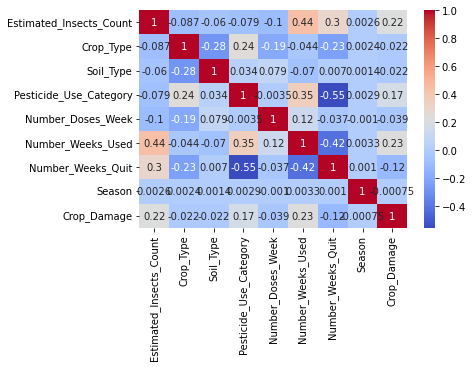

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Figure size 864x360 with 0 Axes>

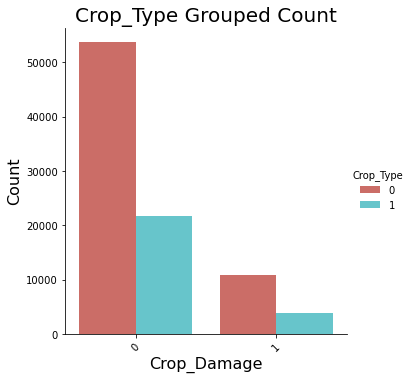

In [20]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Crop Damage vs Number Week Used')

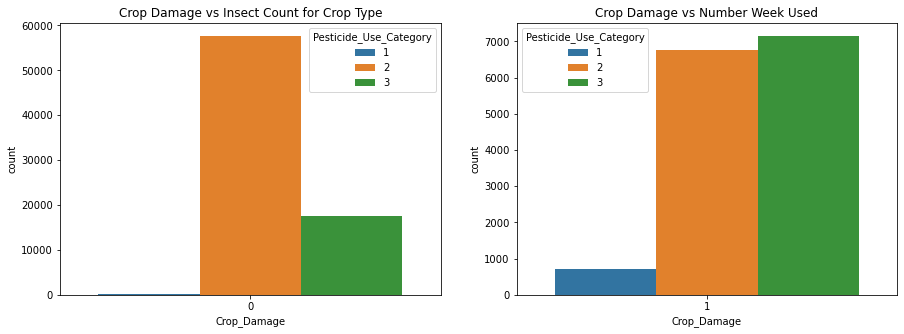

In [21]:
fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")


<Figure size 864x360 with 0 Axes>

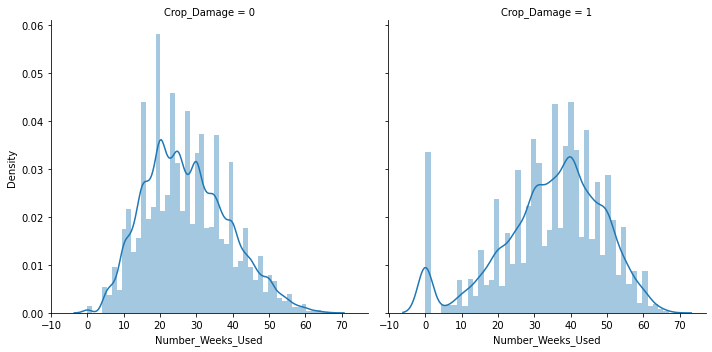

In [22]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

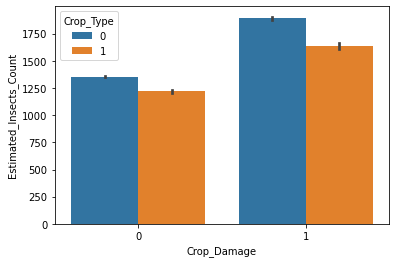

In [23]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

<Figure size 864x360 with 0 Axes>

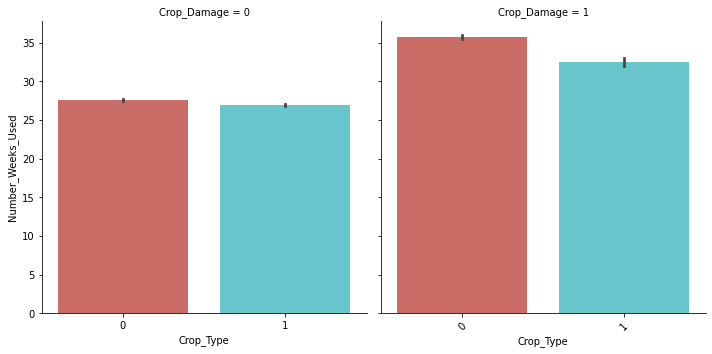

In [24]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Lets use the describe function 
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,90057.000000,90057.000000,90057.000000,90057.000000,90057.000000,90057.000000,90057.000000,90057.000000,90057.000000
mean,1397.544033,0.283176,0.458376,2.265776,25.859345,28.590515,9.556203,1.896754,0.162342
std,849.084475,0.450544,0.498267,0.462837,15.562681,12.218756,9.891771,0.701114,0.368766
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,1.000000


Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

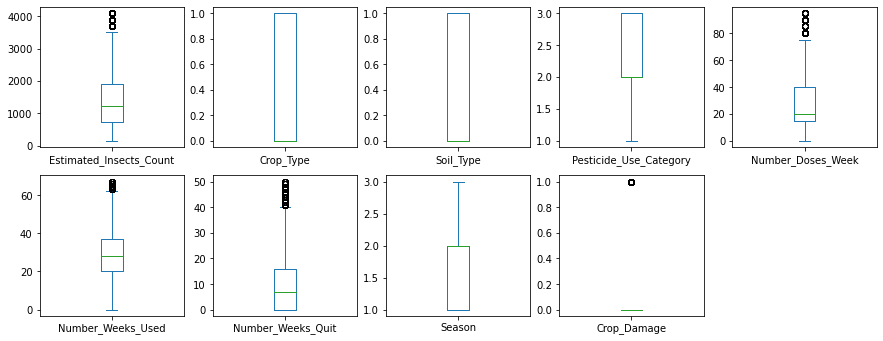

In [26]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [27]:
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

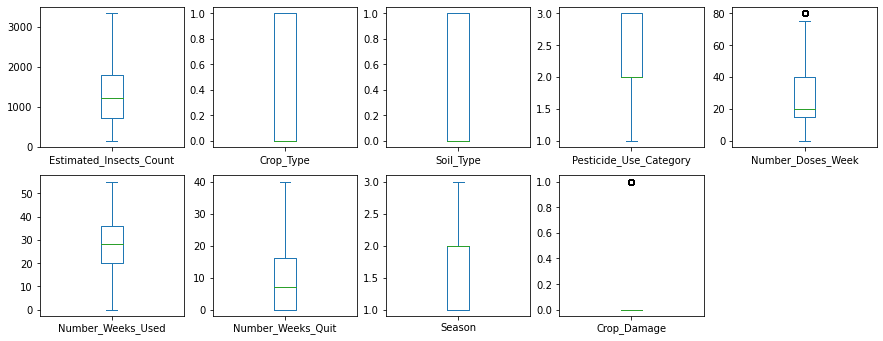

In [28]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>,
        <AxesSubplot:title={'center':'Pesticide_Use_Category'}>],
       [<AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>],
       [<AxesSubplot:title={'center':'Crop_Damage'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

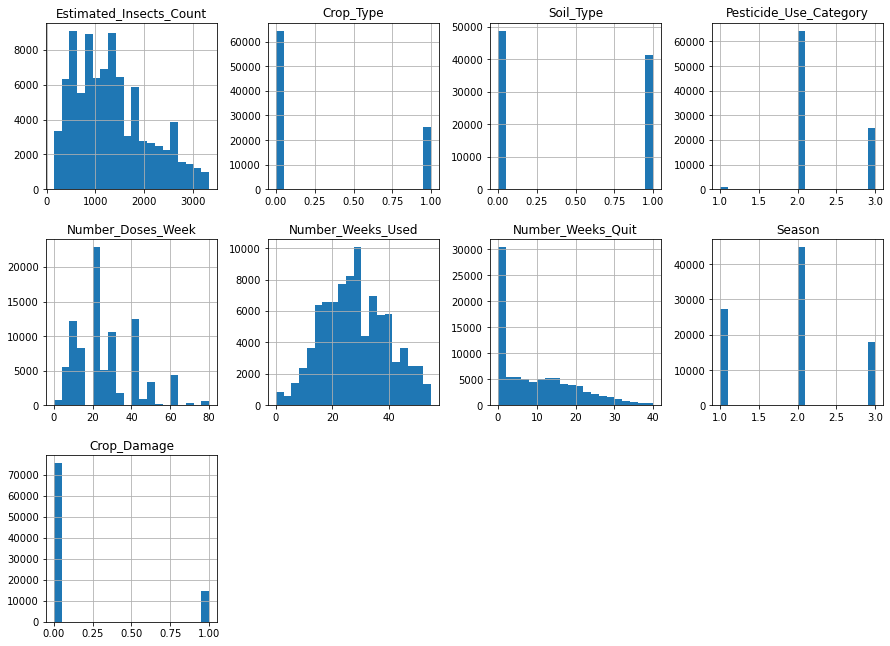

In [29]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [31]:
x=df.drop(columns=['Crop_Damage'])
y=df[["Crop_Damage"]]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 90,test_size=0.10,stratify=y)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc = sc.fit_transform(x)

In [33]:
kNN=KNeighborsClassifier()
parameters={"n_neighbors":range(2,40)}
clf = GridSearchCV(kNN, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 18}

In [34]:
kNN=KNeighborsClassifier(n_neighbors=18)
kNN.fit(x,y)
y_pred=kNN.predict(x_test)
print("accuracy score is : ",accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

accuracy score is :  0.8610926049300467
classification report 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      7544
           1       0.73      0.23      0.35      1462

    accuracy                           0.86      9006
   macro avg       0.80      0.61      0.63      9006
weighted avg       0.85      0.86      0.83      9006



[[7424  120]
 [1131  331]]


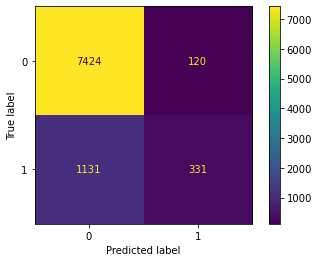

In [35]:
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(kNN, x_test, y_test)  
plt.show()

In [39]:
param_grid = {'n_estimators':[50,150],'learning_rate':[0.1,0.5,1]}
ad = GridSearchCV(AdaBoostClassifier(),param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


0.8496557850322007
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7544
           1       0.61      0.20      0.30      1462

    accuracy                           0.85      9006
   macro avg       0.74      0.59      0.61      9006
weighted avg       0.82      0.85      0.82      9006



[[7357  187]
 [1167  295]]


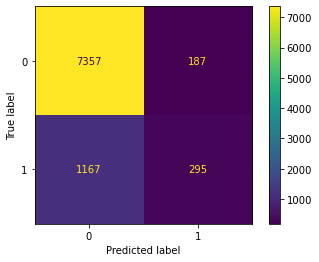

In [40]:
print(confusion_matrix(y_test,ad_pred))
plot_confusion_matrix(ad, x_test, y_test)  
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
param_grid = {'criterion':['gini','entropy'],'n_estimators':[100,150,200],'max_depth':[None,1,3,5,10],'min_samples_split':[5,10],'min_samples_leaf':[5,10]}
rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
rf.fit(x_train,y_train)
rf_pred=ad.predict(x_test)
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))





0.8496557850322007
[[7357  187]
 [1167  295]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7544
           1       0.61      0.20      0.30      1462

    accuracy                           0.85      9006
   macro avg       0.74      0.59      0.61      9006
weighted avg       0.82      0.85      0.82      9006



Model accuracy score with criterion entropy: 0.8461


[Text(334.8, 380.52, 'X[5] <= 28.295\nentropy = 0.64\nsamples = 81051\nvalue = [67893, 13158]'),
 Text(167.4, 271.8, 'X[3] <= 1.5\nentropy = 0.425\nsamples = 42018\nvalue = [38380, 3638]'),
 Text(83.7, 163.07999999999998, 'X[5] <= 14.0\nentropy = 0.655\nsamples = 759\nvalue = [128, 631]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.652\nsamples = 758\nvalue = [127, 631]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 1341.0\nentropy = 0.377\nsamples = 41259\nvalue = [38252, 3007]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.286\nsamples = 29306\nvalue = [27843, 1463]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.555\nsamples = 11953\nvalue = [10409, 1544]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 2.5\nentropy = 0.801\nsamples = 39033\nvalue = [29513, 9520]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 1391.272\nentropy = 0.629\nsamples = 23965\nvalue = [20182, 3783]'),
 

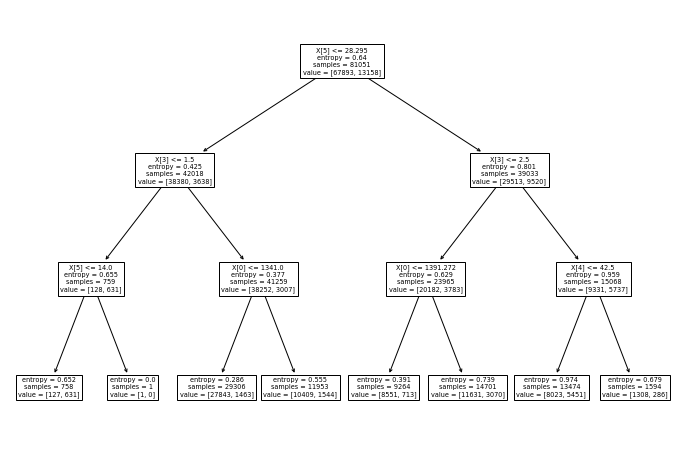

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train))

In [48]:
input_data = (209.0,1,0,1,0.0,0.0,0.0,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = kNN.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print("ALIVE")
else:
    print("DAMAGED DUE TO OTHER CAUSES")

[0]
ALIVE


In [49]:
import pickle

In [50]:
filename = 's_model.sav'
pickle.dump(kNN, open(filename, 'wb'))

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))
